In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings

import sys

sys.path.insert(0, "../code_workspace")

from data_prep import *
from post_analysis import *

warnings.filterwarnings("ignore")

/Users/suatakbulut/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Javascript object>

In [3]:
use_saved_one = True
unwanted_column_endings = []
test_size = 0.4

X_train, X_test, y_train, y_test = prepare_train_test_split(
    use_saved_one=use_saved_one,
    unwanted_column_endings=unwanted_column_endings,
    test_size=test_size,
)


DATA PREP

Loading processed data from ../data/processed_dataset.pkl..
Excluding the following columns..
['patient_id', 'Outcome 30 days Hospitalization', 'Height(in)', 'Weight(lbs)']
Shapes: X_train: (108861, 136) - X_test: (72574, 136)


<IPython.core.display.Javascript object>

In [4]:
models_path = "../trained_models/results_df_0.77_AUC_0.61_Rec.pkl"
results_df = pd.read_pickle(models_path)
results_df

,classifier_class,trained_model,train_time,F1_Score,AUC,Accuracy,Precision,Recall
1,RandomForestClassifier,"GridSearchCV(cv=5,\n estimator=Pip...",47.14,0.638952,0.769360,0.706686,0.674594,0.606889
5,DecisionTreeClassifier,"GridSearchCV(cv=5,\n estimator=Pip...",1.13,0.603066,0.734679,0.681015,0.644530,0.566614
3,GaussianNB,"GridSearchCV(cv=5,\n estimator=Pip...",0.06,0.556201,0.652868,0.617590,0.552130,0.560331
4,QuadraticDiscriminantAnalysis,"GridSearchCV(cv=5,\n estimator=Pip...",0.15,0.556848,0.693367,0.645107,0.597497,0.521378
2,GradientBoostingClassifier,"GridSearchCV(cv=5,\n estimator=Pip...",0.61,0.567899,0.750243,0.687698,0.695461,0.479879
0,LogisticRegression,"GridSearchCV(cv=5,\n estimator=Pip...",4.02,0.531737,0.712588,0.661504,0.651015,0.449399


<IPython.core.display.Javascript object>

In [5]:
classifier_class = (
    "RandomForestClassifier"  # could use "GradientBoostingClassifier" as well
)
model = (
    results_df[results_df.classifier_class == classifier_class]
    .trained_model.values[0]
    .best_estimator_
)

<IPython.core.display.Javascript object>

Elapsed time to compute feature importances: 0.00 mins
Calculating permutation importance. This could take a while..


/Users/suatakbulut/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/suatakbulut/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/suatakbulut/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/suatakbulut/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.

Elapsed time to compute permutation importances: 18.90 mins
Figure is saved at ../data/RandomForestClassifier_permutation_feature_importance.png


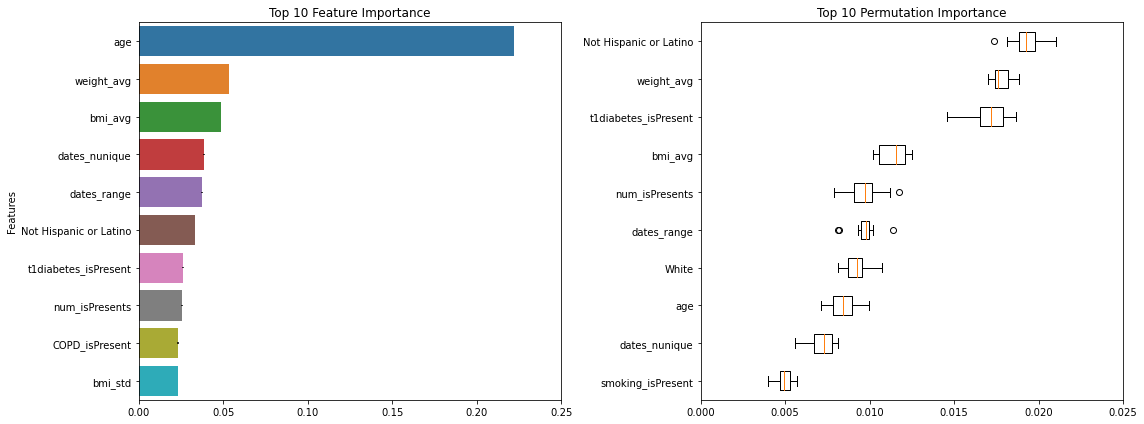

<IPython.core.display.Javascript object>

In [6]:
fig = plot_perm_and_feature_importances(model, X_test, y_test, classifier_class)